In [1]:
from figure1 import extract_slha
from figure1 import slha_folder
from figure1 import plot
import pandas as pd
from particle_name import particles_names
particles_name = particles_names()

In [2]:
df_desin = slha_folder('M2from0to1200M12000mu100')

In [3]:
df_desin.head(80)

,M_1(MX),M_2(MX),mu(MX),particle_id,branching_ratio,decay_products
0,2000.0,0.0,100.0,1000024,0.643638,"(211, 1000022)"
1,2000.0,0.0,100.0,1000024,0.185165,"(-13, 14, 1000022)"
2,2000.0,0.0,100.0,1000024,0.131439,"(-11, 12, 1000022)"
3,2000.0,0.0,100.0,1000024,0.039758,"(111, 211, 1000022)"
4,2000.0,0.0,100.0,1000037,0.572773,"(24, 1000022)"
...,...,...,...,...,...,...
75,2000.0,1005.0,100.0,1000023,0.124636,"(-4, 4, 1000022)"
76,2000.0,1005.0,100.0,1000023,0.077430,"(-12, 12, 1000022)"
77,2000.0,1005.0,100.0,1000023,0.077430,"(-14, 14, 1000022)"
78,2000.0,1005.0,100.0,1000023,0.077430,"(-16, 16, 1000022)"


In [4]:
# Filter the data for neutralino 2 and mu(MX) = 1000
filtered_data_N3 = df_desin[(df_desin['particle_id'] == 1000025)]

# Group by M_2(MX) and decay_products and sum the branching ratios
grouped_data_N3 = filtered_data_N3.groupby(['M_2(MX)', 'decay_products']).branching_ratio.sum().reset_index()

# Pivot the data to have decay_products as columns
pivot_data_N3 = grouped_data_N3.pivot(index='M_2(MX)', columns='decay_products', values='branching_ratio')

# Fill NaN values with 0
pivot_data_N3.fillna(0, inplace=True)
def latex_decay_products_to_names(decay_tuple_str):
    return tuple(particles_name.get(int(pid.strip()), pid.strip()) for pid in decay_tuple_str.strip('()').split(','))

pivot_data_N3.columns = [latex_decay_products_to_names(str(col)) for col in pivot_data_N3.columns]
pivot_data_N3.head()

,"(\tilde{\chi}_1^-, W^+)","(W^-, \tilde{\chi}_1^+)","(\bar{\nu}_\tau, \nu_\tau, \tilde{\chi}_2^0)","(\bar{\nu}_\mu, \nu_\mu, \tilde{\chi}_2^0)","(\bar{\nu}_e, \nu_e, \tilde{\chi}_2^0)","(\bar{b}, b, \tilde{\chi}_2^0)","(\bar{c}, c, \tilde{\chi}_2^0)","(\bar{s}, s, \tilde{\chi}_2^0)","(\bar{u}, u, \tilde{\chi}_2^0)","(\bar{d}, d, \tilde{\chi}_2^0)","(Z, \tilde{\chi}_1^0)","(Z, \tilde{\chi}_2^0)","(h^0, \tilde{\chi}_1^0)","(h^0, \tilde{\chi}_2^0)"
M_2(MX),,,,,,,,,,,,,,
0.0,0.453040,0.453040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.093919,0.0,0.000000,0.0
5.0,0.453375,0.453375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.092355,0.0,0.000895,0.0
10.0,0.453929,0.453929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.089569,0.0,0.002574,0.0
15.0,0.455542,0.455542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.084858,0.0,0.004058,0.0
20.0,0.458216,0.458216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078564,0.0,0.005003,0.0


In [5]:
# Filter the data for neutralino 2 and mu(MX) = 1000
filtered_data_C2 = df_desin[(df_desin['particle_id'] == 1000037)]

# Group by M_2(MX) and decay_products and sum the branching ratios
grouped_data_C2 = filtered_data_C2.groupby(['M_2(MX)', 'decay_products']).branching_ratio.sum().reset_index()

# Pivot the data to have decay_products as columns
pivot_data_C2 = grouped_data_C2.pivot(index='M_2(MX)', columns='decay_products', values='branching_ratio')

# Fill NaN values with 0
pivot_data_C2.fillna(0, inplace=True)
pivot_data_C2.columns = [latex_decay_products_to_names(str(col)) for col in pivot_data_C2.columns]
pivot_data_C2.head()

,"(\bar{s}, c, \tilde{\chi}_2^0)","(\bar{d}, u, \tilde{\chi}_2^0)","(Z, \tilde{\chi}_1^+)","(W^+, \tilde{\chi}_1^0)","(W^+, \tilde{\chi}_2^0)","(h^0, \tilde{\chi}_1^+)"
M_2(MX),,,,,,
0.0,0.000000,0.000000,0.374337,0.572773,0.0,0.052729
5.0,0.000000,0.000000,0.376522,0.571535,0.0,0.051768
10.0,0.000000,0.000000,0.380734,0.568410,0.0,0.050663
15.0,0.000000,0.000000,0.380422,0.569982,0.0,0.049379
20.0,0.000118,0.000118,0.375833,0.576819,0.0,0.047099


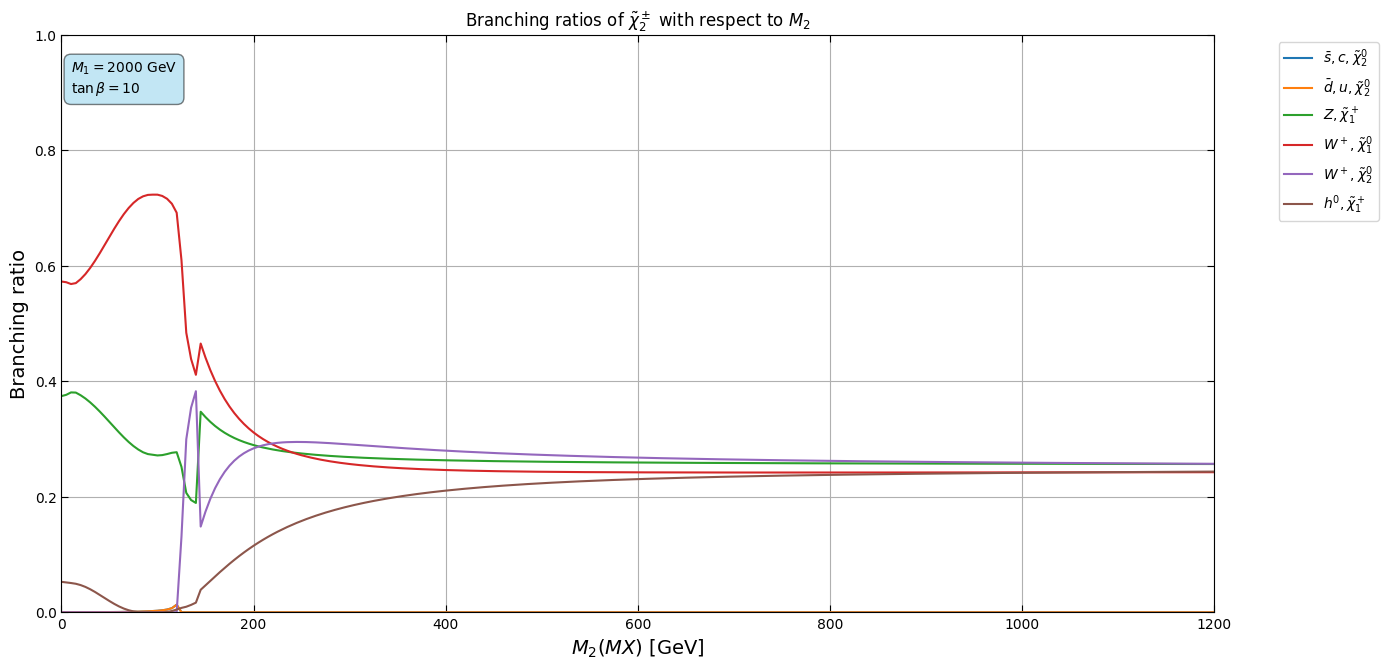

In [6]:
plot(pivot_data_C2, 2000, 100, 10, r'Branching ratios of $\tilde{\chi}_2^\pm$ with respect to $M_2$', '-')

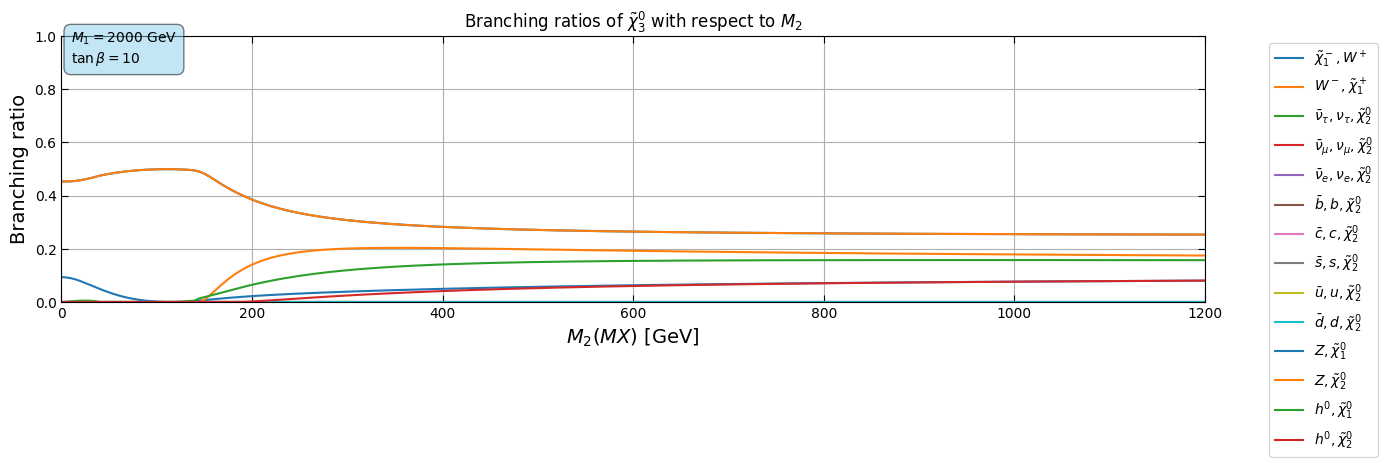

In [7]:
plot(pivot_data_N3, 2000, 100, 10, r'Branching ratios of $\tilde{\chi}_3^0$ with respect to $M_2$', '-')

In [8]:


def latex_decay_products_to_names(decay_tuple_str):
    return tuple(particles_name.get(int(pid.strip()), pid.strip()) for pid in decay_tuple_str.strip('()').split(','))

